# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [24]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
data=make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

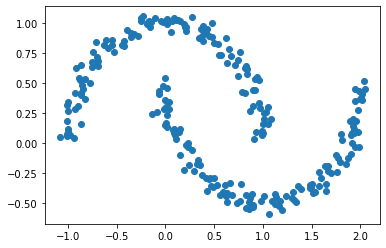

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])


# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.


K means won't do very well in the above dataset becuase it will search for centriods to split it but it's shape won't help i think best preformance can be by splitting into 3 clusters middle and left and right for this dataset

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

e:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


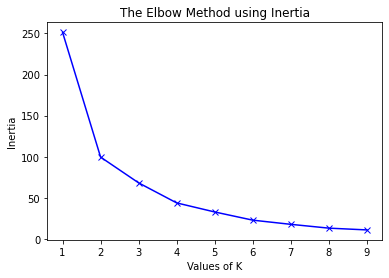

In [32]:
from sklearn import metrics
from scipy.spatial.distance import cdist
inertias = []
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	
	inertias.append(kmeanModel.inertia_)

	# mapping2[k] = kmeanModel.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

kmeanModel = KMeans(n_clusters=2)
label=kmeanModel.fit_predict(X)



Amount of clusters: 2


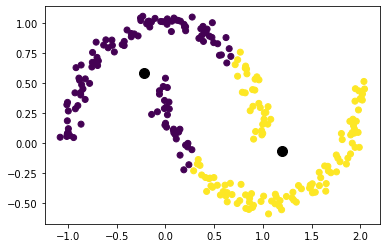

In [33]:

plt.scatter(X[:, 0], X[:, 1], c = label)
cl_centers = kmeanModel.cluster_centers_
print("Amount of clusters:", len(cl_centers))
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

Amount of clusters: 3


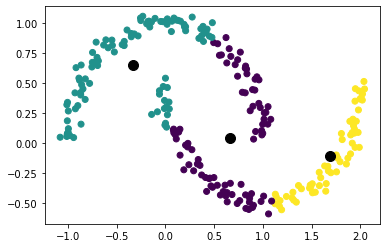

In [28]:
kmeans = KMeans(n_clusters=3)
label=kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = label)
cl_centers = kmeans.cluster_centers_
print("Amount of clusters:", len(cl_centers))
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

to determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.
and we can see that in K=2 data isn't well split but in 3 it's kinda better (not good preformance) but it did split it in 3 parts left and middle and right which is better than before

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

Amount of clusters: 2


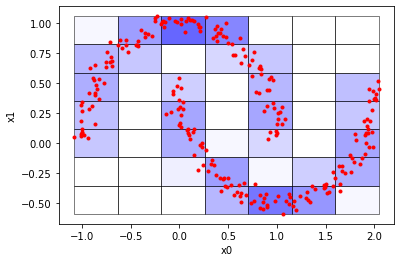

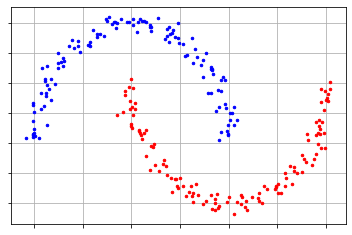

In [34]:
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
intervals = 7
threshold = 1 # block that contains 3 or less points is considered as a outlier as well as its points
clique_instance = clique(X, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
clique_visualizer.show_grid(cells, X)

clique_visualizer.show_clusters 	( 	  	X,
		  	clusters,
		  	noise = None 
	) 		


Threshold = 1 and interval = 7 gives the best result 

Clique does take the continuity and density of the units into account while processing to split the data well and there are some outlayers If this points are taken into account it would have given wrong number of clustering   

 and it does better on this data set becuase k means doesn't take these parameters into consideration k means just searchs for centriod point to split the data which won't work in all cases well


Clique
 Determine maximal regions that cover a cluster of connected dense units for 
each cluster
and it does Determination of minimal cover for each cluster




# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

Amount of clusters: 4


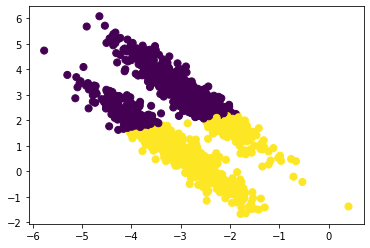

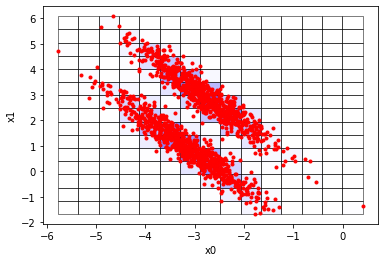

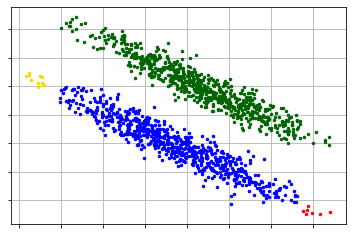

In [21]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
intervals = 15
threshold = 6   # block that contains 3 or less points is considered as a outlier as well as its points
clique_instance = clique(X_aniso, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
labels = KMeans(2, random_state=0).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels,
            s=50, cmap='viridis')

clique_visualizer.show_grid(cells, X_aniso)

clique_visualizer.show_clusters 	( X_aniso,
		  	clusters,
		  	noise = None 
	) 		

number of clusters in clique is 4 as there are some outlayers or points away in the grid not in the interval and if we change interval we can make it 2 clusters and it'll be better to avoid splitting in 4 

k means preform like that as it just search for a centroid to split the data so it just splitted it into upper and lower part 

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [30]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return sorted_eigenvectors,sorted_eigenvalue,X_reduced

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [31]:


def kmeans(x,k):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(10): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        points = np.unique(points)
         
    return points 
 